In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten
import tensorflow as tf

In [3]:
# from tensorflow.keras.datasets import mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

df = pd.read_csv("train.csv")
df.shape

(42000, 785)

In [4]:
df_train, df_validate = df[:33000], df[33000:]
df_train_to4, df_validate_to4 = df_train.loc[df_train['label'] < 5], df_validate.loc[df_validate['label'] < 5]

In [5]:
x_train, y_train = df_train_to4.drop(['label'], axis=1).values, df_train_to4['label'].values
x_train = x_train.astype("float32") / 255.
y_train = tf.keras.utils.to_categorical(y_train, 5)

In [6]:
model = Sequential([
    Dense(784, activation="elu", kernel_initializer="he_normal"),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    Dense(5, activation="softmax")
])


In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:

history = model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=64)
# model.compile?

Train on 13449 samples, validate on 3363 samples
Epoch 1/5
13449/13449 [==============================] - 4s 271us/sample - loss: 0.1385 - accuracy: 0.9549 - val_loss: 0.0736 - val_accuracy: 0.9804
Epoch 2/5
13449/13449 [==============================] - 2s 173us/sample - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0657 - val_accuracy: 0.9807
Epoch 3/5
13449/13449 [==============================] - 2s 175us/sample - loss: 0.0639 - accuracy: 0.9803 - val_loss: 0.0663 - val_accuracy: 0.9813
Epoch 4/5
13449/13449 [==============================] - 2s 176us/sample - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0656 - val_accuracy: 0.9813
Epoch 5/5
13449/13449 [==============================] - 2s 178us/sample - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0558 - val_accuracy: 0.9854


In [9]:
model.save("model0.1.0.h5")

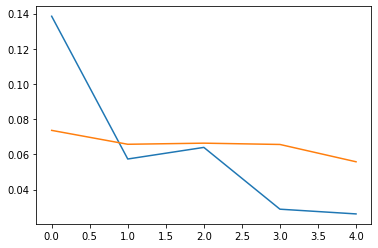

In [12]:
import matplotlib.pyplot as plt
plt.plot([x for x in range(5)], history.history['loss'])
plt.plot([x for x in range(5)], history.history['val_loss'])
plt.show()

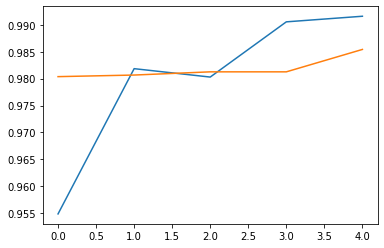

In [13]:
plt.plot([x for x in range(5)], history.history['accuracy'])
plt.plot([x for x in range(5)], history.history['val_accuracy'])
plt.show()

In [16]:
model = Sequential([
    Dense(784, activation="elu", kernel_initializer="he_normal"),
    BatchNormalization(),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    BatchNormalization(),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    BatchNormalization(),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    BatchNormalization(),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    BatchNormalization(),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    BatchNormalization(),
    Dense(5, activation="softmax")
])


In [17]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=64)

Train on 13449 samples, validate on 3363 samples
Epoch 1/20
13449/13449 [==============================] - 6s 434us/sample - loss: 0.1298 - accuracy: 0.9589 - val_loss: 0.0586 - val_accuracy: 0.9816
Epoch 2/20
13449/13449 [==============================] - 3s 222us/sample - loss: 0.0569 - accuracy: 0.9817 - val_loss: 0.0488 - val_accuracy: 0.9878
Epoch 3/20
13449/13449 [==============================] - 3s 220us/sample - loss: 0.0411 - accuracy: 0.9878 - val_loss: 0.0462 - val_accuracy: 0.9854
Epoch 4/20
13449/13449 [==============================] - 3s 223us/sample - loss: 0.0310 - accuracy: 0.9895 - val_loss: 0.0368 - val_accuracy: 0.9899
Epoch 5/20
13449/13449 [==============================] - 3s 233us/sample - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0449 - val_accuracy: 0.9854
Epoch 6/20
13449/13449 [==============================] - 3s 232us/sample - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0386 - val_accuracy: 0.9887
Epoch 7/20
13449/13449 [===========================

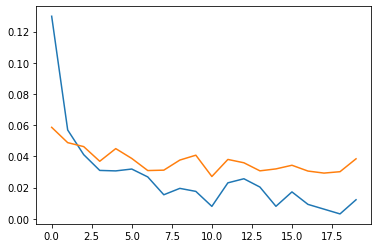

In [19]:
plt.plot([x for x in range(20)], history.history['loss'])
plt.plot([x for x in range(20)], history.history['val_loss'])
plt.show()

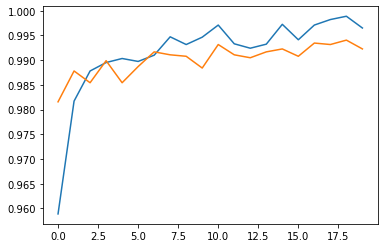

In [20]:
plt.plot([x for x in range(20)], history.history['accuracy'])
plt.plot([x for x in range(20)], history.history['val_accuracy'])
plt.show()